## Sample of watershed()

1. ぼかし処理
2. グレースケール変換
3. しきい値処理
4. ノイズ除去
5. 背景の把握
6. 前景の把握
7. 未知の領域の把握
8. 確実な前景にマーカー処理
9. watershed実行

---
[opencv doc](https://docs.opencv.org/4.4.0/d7/d1b/group__imgproc__misc.html#ga3267243e4d3f95165d55a618c65ac6e1)  
[実行したコード](https://docs.opencv.org/3.4/d3/db4/tutorial_py_watershed.html)  
[参考](https://code-graffiti.com/opencv-watershed-algorithm-in-python/)

(512, 512, 3)


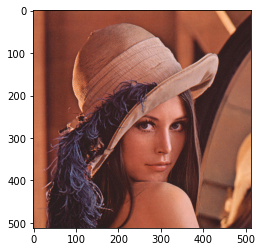

In [44]:
import cv2

import numpy as np
from matplotlib import pyplot as plt

imagePath = "images/lena.png"
# imagePath = "images/sample.png"

img = cv2.imread(imagePath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

print(img.shape)
plt.imshow(img)

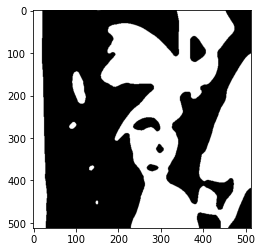

In [51]:
img = cv2.medianBlur(img,5)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray) #白黒を反転

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

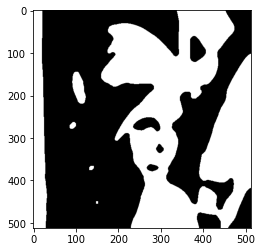

In [52]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

plt.imshow(opening, cmap="gray")

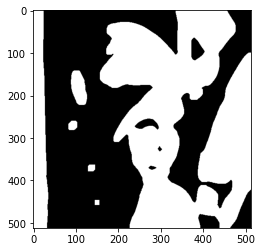

In [53]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.imshow(sure_bg, cmap="gray")

In [54]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [55]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

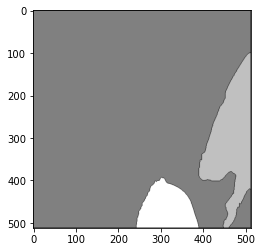

In [57]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers, cmap="gray")